# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [4]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

C:\Dev\Studium\Sem5\DA\data_analytics\Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [5]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles original values

In [70]:
df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1337.00,1.00,26.00,17.90,336.03
0.10,1492.50,1.50,41.50,20.02,525.66
0.25,1842.25,2.50,63.00,23.30,1044.63
0.50,2391.00,3.50,86.00,27.95,1662.60
0.75,3056.75,4.50,108.75,38.12,4778.99
0.90,3960.00,4.75,140.50,52.78,4778.99
0.95,4957.50,5.50,163.75,67.33,4778.99


Task 2

In [36]:
df_no_outliers = df_orig.loc[(df_orig['price_per_m2'] >= 20) & (df_orig['area'] <= 150)]

df_no_outliers[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1340.0,1.0,25.00,21.43,448.61
0.10,1496.3,1.5,36.10,22.44,578.56
0.25,1833.5,2.5,59.25,24.58,1221.27
0.50,2362.5,3.5,80.00,29.00,1664.59
0.75,2990.0,4.0,100.00,39.32,4778.99
0.90,3799.0,4.5,120.00,55.69,4778.99
0.95,4495.7,4.5,135.00,70.23,4778.99


### Filter apartments

In [37]:
# Filter apartments (replace '<= 5000' by the respective operator and quantile)
# df = df_orig.loc[df_orig['pop_dens'] <= 5000]
df = df_no_outliers.loc[df_no_outliers['pop_dens'] <= 5000]

### Shape (number of rows and colums)

In [38]:
# Number of rows and columns
print(df.shape)

(682, 16)


### Data types

In [39]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [40]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,47.402977,8.595184,190.115836,3.202346,80.253666,0.013196,2571.645161,35.324545,172718.206745,2648.922265,190967.489736,28.408069,80848.329513
std,0.081353,0.115134,81.023499,1.150928,30.827051,0.114199,1152.244589,17.243294,189301.745367,1738.213641,227380.924185,7.347669,14434.429913
min,47.195290,8.367652,1.000000,1.000000,10.000000,0.000000,650.000000,20.000000,698.000000,87.959866,129.000000,7.984791,64322.797996
25%,47.360083,8.517483,121.000000,2.500000,59.250000,0.000000,1833.500000,24.580000,11297.500000,1221.272366,5053.000000,24.535004,71059.805603
50%,47.394114,8.558223,230.000000,3.500000,80.000000,0.000000,2362.500000,29.000000,35007.000000,1664.585987,28864.000000,29.256198,82932.737704
75%,47.457531,8.705355,261.000000,4.000000,100.000000,0.000000,2990.000000,39.315000,420217.000000,4778.994655,491193.000000,32.458468,82932.737704
max,47.693893,8.866929,298.000000,6.500000,150.000000,1.000000,9950.000000,149.900000,420217.000000,4778.994655,491193.000000,46.226483,174434.537050


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [41]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 682 Min: 650.0 Max: 9950.0 Mean: 2571.6 Median: 2362.5 Std: 1152.2
Area: Count: 682 Min: 10.0 Max: 150.0 Mean: 80.3 Median: 80.0 Std: 30.8


### Skewness

In [42]:
df[['price','rooms', 'area']].skew()

price    2.257145
rooms   -0.064235
area     0.003472
dtype: float64

### Kurtosis

In [43]:
df[['price','rooms', 'area']].kurtosis()

price    8.621402
rooms   -0.404586
area    -0.373592
dtype: float64

### Extreme values

In [44]:
# Low costs apartments
df[df['price_per_m2'] <= 10]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income


In [45]:
# Very expansive apartments
df[df['price_per_m2'] >= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
11,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",47.362282,8.522193,261,Zürich,2.0,32.0,0,3515.0,109.84,420217,4778.994655,491193.0,32.458468,82932.737704
20,1693998214-82,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,30.0,0,3790.0,126.33,420217,4778.994655,491193.0,32.458468,82932.737704
21,1693998214-83,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,25.0,0,3490.0,139.60,420217,4778.994655,491193.0,32.458468,82932.737704
107,1693998280-434,"Neugasse 40, 8005 Zürich, ZH",47.382469,8.530180,261,Zürich,1.0,11.0,0,1120.0,101.82,420217,4778.994655,491193.0,32.458468,82932.737704
154,1693998305-585,"Steinstrasse 35, 8003 Zürich, ZH",47.366997,8.520324,261,Zürich,1.0,15.0,0,1500.0,100.00,420217,4778.994655,491193.0,32.458468,82932.737704
171,1693998309-621,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,30.0,0,3890.0,129.67,420217,4778.994655,491193.0,32.458468,82932.737704
185,1693998317-658,"8004 Zürich, ZH",47.380417,8.525352,261,Zürich,1.0,10.0,0,1499.0,149.90,420217,4778.994655,491193.0,32.458468,82932.737704


### Get a list of categories of categorical variable

In [47]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Adliswil', 'Aeugst am Albis', 'Affoltern am Albis', 'Altikon',
       'Andelfingen', 'Bachenbülach', 'Bassersdorf', 'Bauma',
       'Bonstetten', 'Bülach', 'Dielsdorf', 'Dietikon', 'Dietlikon',
       'Dübendorf', 'Dürnten', 'Egg', 'Eglisau', 'Elsau', 'Embrach',
       'Fehraltorf', 'Feuerthalen', 'Fällanden', 'Glattfelden',
       'Gossau (ZH)', 'Greifensee', 'Hedingen', 'Herrliberg',
       'Hettlingen', 'Hinwil', 'Hochfelden', 'Hombrechtikon', 'Höri',
       'Hüttikon', 'Kloten', 'Knonau', 'Küsnacht (ZH)',
       'Langnau am Albis', 'Laufen-Uhwiesen', 'Lindau', 'Lufingen',
       'Maur', 'Meilen', 'Mettmenstetten', 'Männedorf', 'Neerach',
       'Neftenbach', 'Niederglatt', 'Niederhasli', 'Niederweningen',
       'Nürensdorf', 'Oberengstringen', 'Oberglatt', 'Obfelden',
       'Oetwil am See', 'Oetwil an der Limmat', 'Opfikon', 'Ossingen',
       'Pfungen', 'Pfäffikon', 'Regensdorf', 'Rheinau', 'Richterswil',
       'Rorbas', 'Russikon', 'Rümlang', 'Rüschlikon', 'Rüti (ZH)',

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [48]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5
luxurious,,,,,,,,,,,,
0,49,36,39,132,42,187,25,132,2,25,1,3
1,0,0,0,6,0,3,0,0,0,0,0,0


### Pivot tables

In [49]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0            49   29.918367    49  1317.224490           49  52.329388
1.5   0            36   35.333333    36  2110.166667           36  65.455000
2.0   0            39   54.589744    39  2155.846154           39  42.528462
2.5   0           132   65.537879   132  2387.325758          132  37.449545
      1             6   72.166667     6  3339.500000            6  45.978333
3.0   0            42   67.642857    42  1998.119048           42  29.290952
3.5   0           187   88.577540   187  2657.000000          187  30.030107
      1             3  101.666667     3  6036.666667            3  59.826667
4.0   0            25   93.280000    25  2920.640000           25  31.176000
4.5   0           132  111.068182   132  3126.909091          132  27.729091
5.0   0             2  115.000000     2  3392.500000            2  29.670000
5.5   0            25  130.920000    25  3496.000000           25  26.516000
6.0   0             1  150.000000     1  4800.000000            1  32.000000
6.5   0             3  142.000000     3  3489.000000            3  24.596667

### Correlation matrix

In [50]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.981437,0.369012,-0.570729,-0.683810,-0.746514
area,0.981437,1.000000,0.540393,-0.402681,-0.531184,-0.605062
price,0.369012,0.540393,1.000000,0.552569,0.425635,0.342673
price_per_m2,-0.570729,-0.402681,0.552569,1.000000,0.989184,0.972105
pop_dens,-0.683810,-0.531184,0.425635,0.989184,1.000000,0.995954
frg_pct,-0.746514,-0.605062,0.342673,0.972105,0.995954,1.000000


### Covariance matrix

In [51]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.324635,30.477965,5.626270e+02,-9.557037,-6.469616e+02,-1.903606
area,30.477965,950.307072,2.043612e+04,-263.657307,-1.452856e+04,-45.971190
price,562.626972,20436.123916,1.327668e+06,5780.972408,5.921683e+05,884.233036
price_per_m2,-9.557037,-263.657307,5.780972e+03,297.331196,1.699903e+04,37.263932
pop_dens,-646.961600,-14528.557472,5.921683e+05,16999.032537,3.021387e+06,8174.526091
frg_pct,-1.903606,-45.971190,8.842330e+02,37.263932,8.174526e+03,53.988244


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

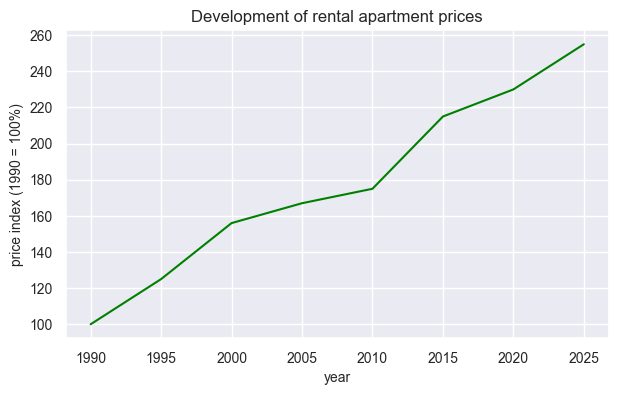

In [54]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

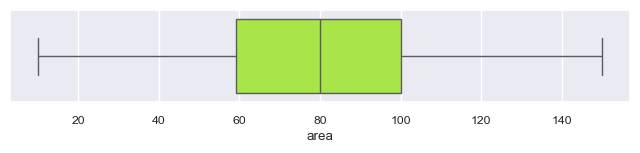

In [53]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

### Histogram  (matplotlib)

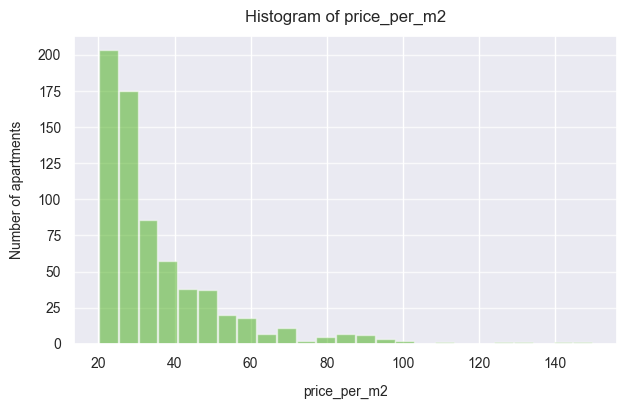

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

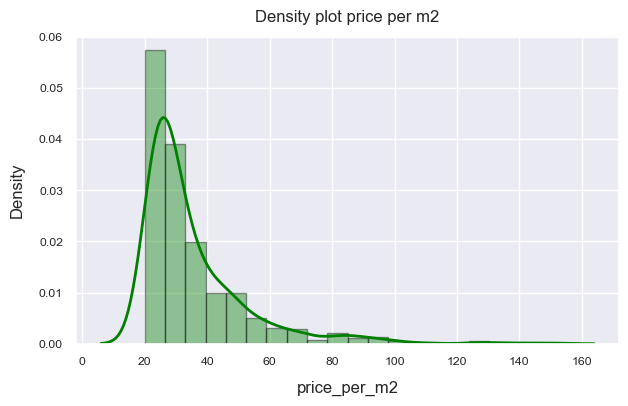

In [56]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      area       var
185   10.0 -2.278962
107   11.0 -2.246523
190   14.0 -2.149205
52    15.0 -2.116766
431   15.0 -2.116766
..     ...       ...
145  148.0  2.197626
510  150.0  2.262504
502  150.0  2.262504
290  150.0  2.262504
621  150.0  2.262504

[682 rows x 2 columns]


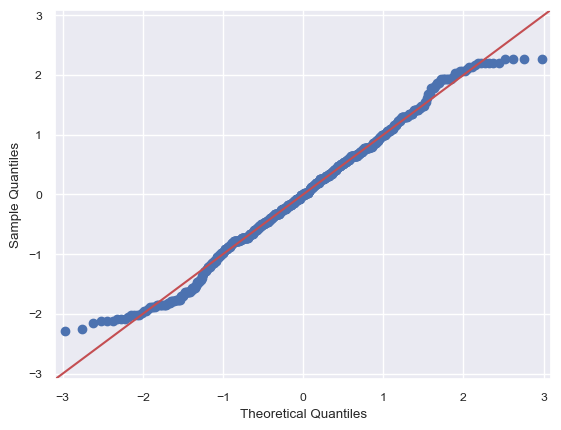

In [57]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [58]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[np.float64(6.0),
 np.float64(5.0),
 np.float64(6.5),
 np.float64(4.0),
 np.float64(5.5),
 np.float64(1.5),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(1.0),
 np.float64(4.5),
 np.float64(2.5),
 np.float64(3.5)]

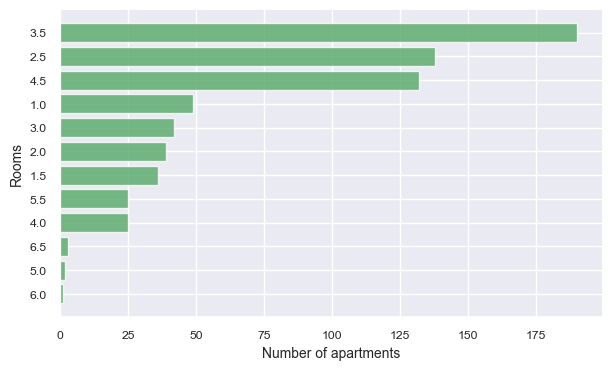

In [59]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

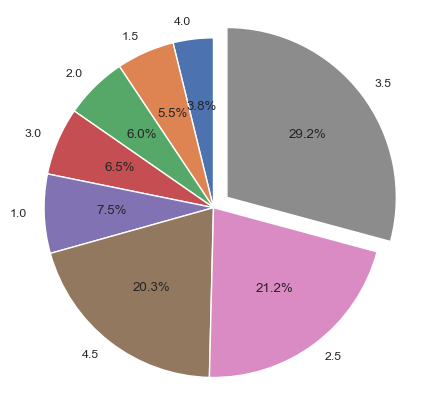

In [60]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

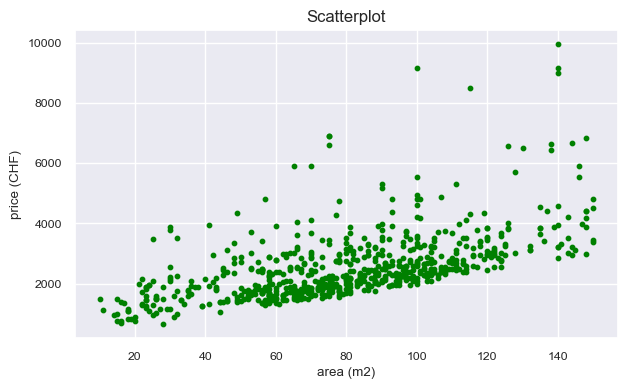

In [62]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(670, 17)
20.97225953616525
897.0787228614009


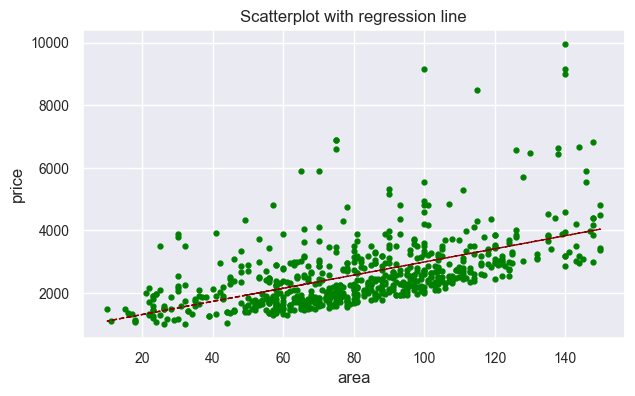

In [63]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

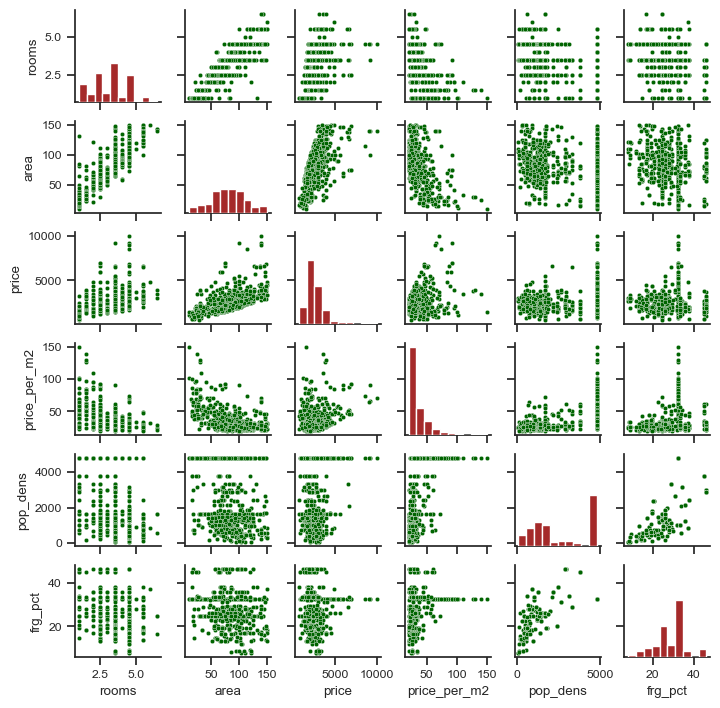

In [64]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(668, 17)


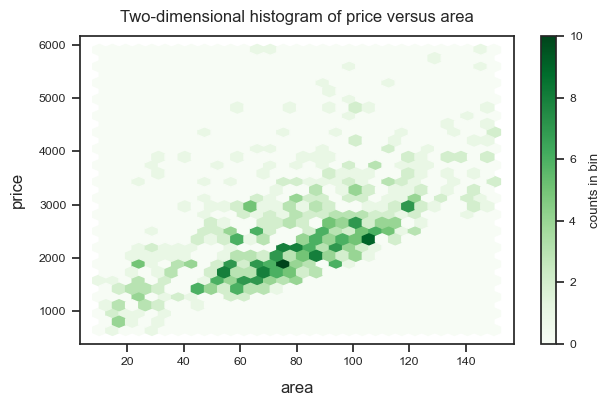

In [66]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

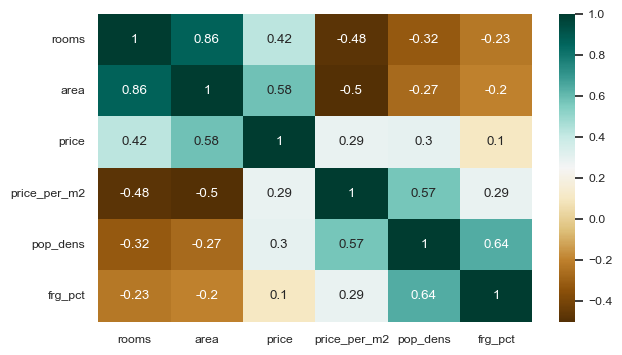

In [67]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

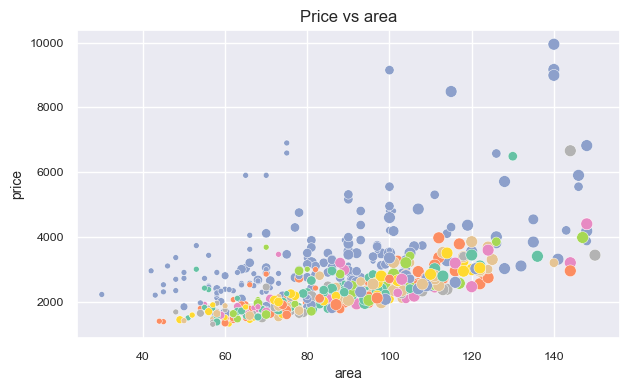

In [68]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [69]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 11
Datetime: 2025-10-11 11:28:31
Python Version: 3.13.7
-----------------------------------
